# Image Classification

In [34]:
import tensorflow as tf

## Load the data

In [35]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255, x_test/255

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Build the model

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Compile the model

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [38]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3023 - accuracy: 0.9128 - val_loss: 0.1543 - val_accuracy: 0.9548
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1449 - accuracy: 0.9565 - val_loss: 0.1054 - val_accuracy: 0.9690
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1104 - accuracy: 0.9666 - val_loss: 0.0889 - val_accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0896 - accuracy: 0.9719 - val_loss: 0.0811 - val_accuracy: 0.9763
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0768 - accuracy: 0.9764 - val_loss: 0.0780 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0658 - accuracy: 0.9789 - val_loss: 0.0735 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0579 - accuracy: 0.9814 - val_loss: 0.0729 - val_accuracy:

## Loss per iteration

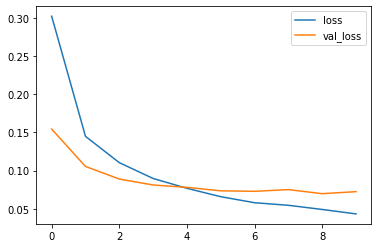

In [39]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

## Accuracy per iteration

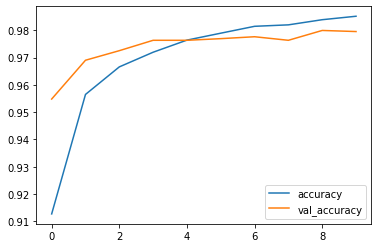

In [40]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

## Evaluate the model

In [41]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0724 - accuracy: 0.9795
[0.07239549607038498, 0.9794999957084656]


## Plot confusion matrix

Confusion matrix without normalization
[[ 969    0    0    1    1    1    3    1    4    0]
 [   0 1127    3    1    0    0    1    1    2    0]
 [   1    4 1006    1    3    0    1    6    8    2]
 [   0    0    2  996    0    4    0    6    2    0]
 [   1    0    2    0  955    0    6    3    2   13]
 [   2    0    0   12    1  861    6    2    6    2]
 [   4    3    1    1    5    3  938    0    3    0]
 [   2    4    8    1    1    0    0 1008    0    4]
 [   3    1    2    6    1    1    1    6  951    2]
 [   3    2    0    3    7    2    0    5    3  984]]


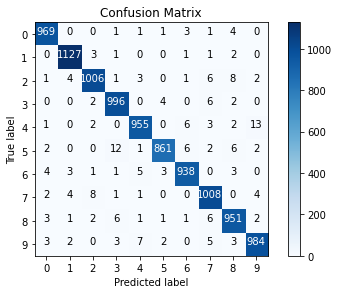

In [42]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

## Show some missclassified examples

Text(0.5, 1.0, 'True label: 5 Predicted: 6')

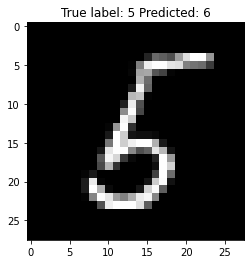

In [43]:
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))